In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
#Read in data
df = pd.read_csv("cleaned_reddit_convo.csv")
df.head(5)

,Unnamed: 0,0
0,0,What kind of phone(s) do you guys have?
1,1,I have a pixel. It's pretty great. Much better...
2,2,Does it really charge all the way in 15 min?
3,4,Samsung Galaxy J1. It's my first cell phone an...
4,5,What do you think of it? Anything you don't like?


# Some extra cleaning. Replacing html ampersand codes.
from w3lib.html import replace_entities
df["text"] = df["text"].astype(str)
df["text"] = df["text"].apply(replace_entities)

# Positive/Negative Word Counts
Positive and negative word lists pulled from https://ptrckprry.com/course/ssd/data/positive-words.txt
and https://ptrckprry.com/course/ssd/data/negative-words.txt
respectively.

First we read in the word lists and set up functions that will count their occurences.

In [6]:
with open("../twitter_stream/wordLists/positive_words.txt",'r') as file:
    positive_words = file.read().splitlines()

with open("../twitter_stream/wordLists/negative_words.txt",'r') as file:
    negative_words = file.read().splitlines()

In [7]:
print(len(positive_words))
print(len(negative_words))

2006
4783


In [8]:
#Functions that count the occurences of positive/negative words in a text string
def count_positive(text):
    counter = 0
    for word in positive_words:
        counter += text.lower().split().count(word)
    return counter
def count_negative(text):
    counter = 0
    for word in negative_words:
        counter += text.lower().split().count(word)
    return counter

We create the new features (this takes a minute to run)

In [9]:
df["positive_words"] = df["0"].apply(count_positive)

In [11]:
df["negative_words"] = df["0"].apply(count_negative)

Look at some stats

In [9]:
df.positive_words.describe()

count    218167.000000
mean          0.390426
std           0.657715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: positive_words, dtype: float64

In [10]:
df.positive_words.describe()

count    218167.000000
mean          0.390426
std           0.657715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: positive_words, dtype: float64

What are the most positive and negative tweets?

In [11]:
most_positive = df["positive_words"].argmax()

In [12]:
print(df.iloc[most_positive].text)
print(df.iloc[most_positive].positive_words)

I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I LOVE HIM I...
11


In [13]:
most_negative = df["negative_words"].argmax()

In [14]:
print(df.iloc[most_negative].text)
print(df.iloc[most_negative].negative_words)

did maz get suspended no no no no fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck
15


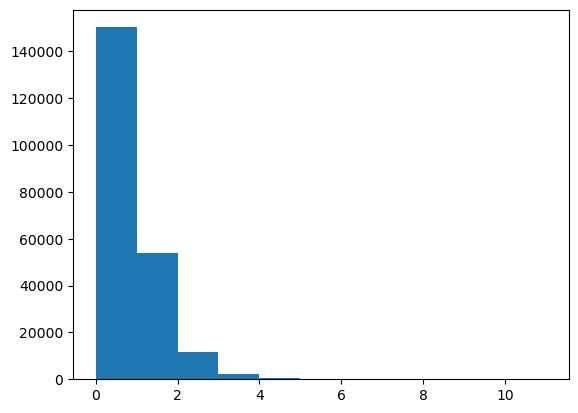

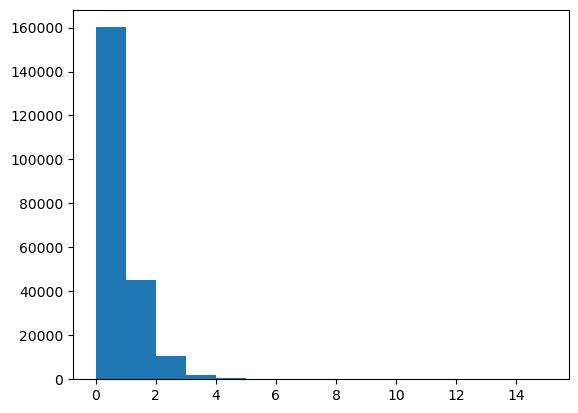

In [15]:
plt.hist(df.positive_words, bins = df.positive_words.max())
plt.show()
plt.hist(df.negative_words, bins = df.negative_words.max())
plt.show()

# Text Length

In [16]:
df["length"] = df["text"].apply(len)
df["word_count"] = df["text"].apply((lambda s:len(s.split())))

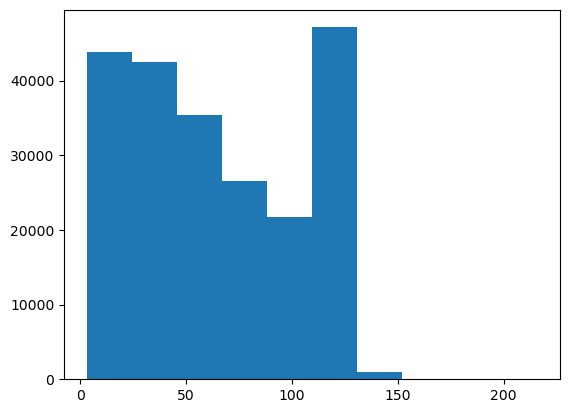

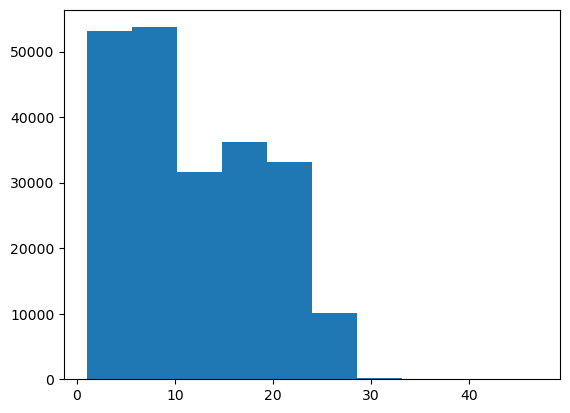

In [17]:
plt.hist(df["length"])
plt.show()
plt.hist(df["word_count"])
plt.show()

# Male and Female words
Word lists adapted from https://github.com/DanielleSucher/Jailbreak-the-Patriarchy/blob/master/myscript.js

In [18]:
with open("wordLists/male_words", 'r') as file:
    male_words = file.read().splitlines()

In [19]:
with open("wordLists/female_words", 'r') as file:
    female_words = file.read().splitlines()

In [20]:
def count_male(text):
    counter = 0
    for word in male_words:
        counter += text.lower().split().count(word)
    return counter
def count_female(text):
    counter = 0
    for word in female_words:
        counter += text.lower().split().count(word)
    return counter

In [21]:
df["male_words"] = df["text"].apply(count_male)

In [22]:
df["female_words"] = df["text"].apply(count_female)

In [23]:
df["male_words"].describe()

count    218167.000000
mean          0.151114
std           0.593380
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: male_words, dtype: float64

In [24]:
df["female_words"].describe()

count    218167.000000
mean          0.107541
std           0.539676
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: female_words, dtype: float64

What are the most male and female tweets in the dataset?

In [25]:
df.iloc[df["female_words"].argmax()].text

'trans women are women trans women are women trans women are women trans women are women trans women are women repeat after me...'

In [26]:
df.iloc[df["male_words"].argmax()].text

'King & Prince Mazy Night  King & Prince Mazy Night King & Prince Mazy Night King & Prince Mazy Night King & Prince Mazy Nigh...'

# Sentiment analysis scores from Afinn

In [ ]:
from afinn import Afinn
afinn = Afinn(language='en')
df["afinn"] = df["text"].apply(afinn.score)

In [ ]:
df.sample(10)

In [ ]:
df["a"]

# Save the resulting Dataframe!

In [ ]:
df.to_csv("twitter_stream_with_features.csv")